# DATA PREPROCESSING SAMPLE FOR LOAN PREDICTION

## DATA CLEANING
## Handle Missing Data

In [4]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

In [5]:
TrainData = pd.read_csv("Train Data.csv", delimiter = ',', header = 0, index_col = 0)
print(TrainData)

          Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                           
LP001002    Male      No          0      Graduate            No   
LP001003    Male     Yes          1      Graduate            No   
LP001005    Male     Yes          0      Graduate           Yes   
LP001006    Male     Yes          0  Not Graduate            No   
LP001008    Male      No          0      Graduate            No   
...          ...     ...        ...           ...           ...   
LP002978  Female      No          0      Graduate            No   
LP002979    Male     Yes         3+      Graduate            No   
LP002983    Male     Yes          1      Graduate            No   
LP002984    Male     Yes          2      Graduate            No   
LP002990  Female      No          0      Graduate           Yes   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                           

In [7]:
#Identify missing data of both types, numerical and categorical data
NumericData = TrainData.select_dtypes(exclude = ['object']).columns.tolist()
print(NumericData)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [8]:
#Numerical data with loan id
TrainData_n = TrainData[NumericData]
print(TrainData_n, '\n')

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002             5849                0.0         NaN             360.0   
LP001003             4583             1508.0       128.0             360.0   
LP001005             3000                0.0        66.0             360.0   
LP001006             2583             2358.0       120.0             360.0   
LP001008             6000                0.0       141.0             360.0   
...                   ...                ...         ...               ...   
LP002978             2900                0.0        71.0             360.0   
LP002979             4106                0.0        40.0             180.0   
LP002983             8072              240.0       253.0             360.0   
LP002984             7583                0.0       187.0             360.0   
LP002990             4583                0.0       133.0        

In [9]:
#make sure there are no missing values
#if there are missing values replace with 0
#eliminate any tuple with an attribute marked as 0
MissingZero = SimpleImputer(missing_values = np.NaN , strategy = 'constant', fill_value = 0)
MissingZero.fit(TrainData_n)
TrainData_n = MissingZero.transform(TrainData_n)
print(TrainData_n)

[[5.849e+03 0.000e+00 0.000e+00 3.600e+02 1.000e+00]
 [4.583e+03 1.508e+03 1.280e+02 3.600e+02 1.000e+00]
 [3.000e+03 0.000e+00 6.600e+01 3.600e+02 1.000e+00]
 ...
 [8.072e+03 2.400e+02 2.530e+02 3.600e+02 1.000e+00]
 [7.583e+03 0.000e+00 1.870e+02 3.600e+02 1.000e+00]
 [4.583e+03 0.000e+00 1.330e+02 3.600e+02 0.000e+00]]


In [10]:
CategoricData = TrainData.select_dtypes(include = ['object']).columns.tolist()
print(CategoricData)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [11]:
TrainData_c = TrainData[CategoricData]
print(TrainData_c, '\n')

          Gender Married Dependents     Education Self_Employed Property_Area  \
Loan_ID                                                                         
LP001002    Male      No          0      Graduate            No         Urban   
LP001003    Male     Yes          1      Graduate            No         Rural   
LP001005    Male     Yes          0      Graduate           Yes         Urban   
LP001006    Male     Yes          0  Not Graduate            No         Urban   
LP001008    Male      No          0      Graduate            No         Urban   
...          ...     ...        ...           ...           ...           ...   
LP002978  Female      No          0      Graduate            No         Rural   
LP002979    Male     Yes         3+      Graduate            No         Rural   
LP002983    Male     Yes          1      Graduate            No         Urban   
LP002984    Male     Yes          2      Graduate            No         Urban   
LP002990  Female      No    

In [12]:
MissingStatus1 = SimpleImputer(missing_values = np.NaN , strategy = 'mean')
MissingStatus1.fit(TrainData_n)
TrainData_n = MissingStatus1.transform(TrainData_n)
print(TrainData_n)

[[5.849e+03 0.000e+00 0.000e+00 3.600e+02 1.000e+00]
 [4.583e+03 1.508e+03 1.280e+02 3.600e+02 1.000e+00]
 [3.000e+03 0.000e+00 6.600e+01 3.600e+02 1.000e+00]
 ...
 [8.072e+03 2.400e+02 2.530e+02 3.600e+02 1.000e+00]
 [7.583e+03 0.000e+00 1.870e+02 3.600e+02 1.000e+00]
 [4.583e+03 0.000e+00 1.330e+02 3.600e+02 0.000e+00]]


In [13]:
MissingStatus = SimpleImputer(missing_values = np.NaN , strategy = 'constant', fill_value = 'Not Applicable')
MissingStatus.fit(TrainData_c)
TrainData_c = MissingStatus.transform(TrainData_c)
print(TrainData_c)

[['Male' 'No' '0' ... 'No' 'Urban' 'Y']
 ['Male' 'Yes' '1' ... 'No' 'Rural' 'N']
 ['Male' 'Yes' '0' ... 'Yes' 'Urban' 'Y']
 ...
 ['Male' 'Yes' '1' ... 'No' 'Urban' 'Y']
 ['Male' 'Yes' '2' ... 'No' 'Urban' 'Y']
 ['Female' 'No' '0' ... 'Yes' 'Semiurban' 'N']]


In [14]:
TrainData[NumericData] = TrainData_n
TrainData[CategoricData] = TrainData_c
print(TrainData)

          Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                           
LP001002    Male      No          0      Graduate            No   
LP001003    Male     Yes          1      Graduate            No   
LP001005    Male     Yes          0      Graduate           Yes   
LP001006    Male     Yes          0  Not Graduate            No   
LP001008    Male      No          0      Graduate            No   
...          ...     ...        ...           ...           ...   
LP002978  Female      No          0      Graduate            No   
LP002979    Male     Yes         3+      Graduate            No   
LP002983    Male     Yes          1      Graduate            No   
LP002984    Male     Yes          2      Graduate            No   
LP002990  Female      No          0      Graduate           Yes   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                           

## Handle Noisy Data
## Binning By pd.cut

In [15]:
#Bin by Applicant Income, Coapplicant Income, Loan Amount
print(TrainData['ApplicantIncome'].describe())
#ApplicantIncomeCut = pd.cut(TrainData.iloc[:, 5], 4)
#print(ApplicantIncomeCut)

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


In [16]:
Bins = 10
ApplicantIncomeBinSize = (81000 - 150)/Bins
print(pd.cut(TrainData['ApplicantIncome'], Bins, precision = 0).value_counts(sort=False))

(69.0, 8235.0]        533
(8235.0, 16320.0]      59
(16320.0, 24405.0]     15
(24405.0, 32490.0]      0
(32490.0, 40575.0]      4
(40575.0, 48660.0]      0
(48660.0, 56745.0]      1
(56745.0, 64830.0]      1
(64830.0, 72915.0]      0
(72915.0, 81000.0]      1
Name: ApplicantIncome, dtype: int64


In [17]:
TrainData['ApplicantIncome_Bin'] = pd.cut(TrainData['ApplicantIncome'], Bins, labels = False)
#print(TrainData.head())                                          

In [18]:
print(TrainData['CoapplicantIncome'].describe())

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


In [19]:
print(TrainData['LoanAmount'].describe())

count    614.000000
mean     141.166124
std       88.340630
min        0.000000
25%       98.000000
50%      125.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64


## Binning By Feature Engine

In [20]:
from feature_engine.discretisation import EqualWidthDiscretiser

In [21]:
#Bin by Applicant Income, Coapplicant Income, Loan Amount
ApplicantIncomeFE = EqualWidthDiscretiser(bins=10, return_object = True, return_boundaries = True)
#ApplicantIncomeFE.fit(TrainData)
#ApplicantIncomeFE.transform(TrainData)["ApplicantIncome_b"].value_counts()
#ApplicantIncomeFE = EqualWidthDiscretiser()
#print(ApplicantIncomeFE)
ApplicantIncomeFE.fit(TrainData)
ApplicantIncomeFE.transform(TrainData)["ApplicantIncome"].value_counts()

(-inf, 8235.0]        533
(8235.0, 16320.0]      59
(16320.0, 24405.0]     15
(32490.0, 40575.0]      4
(48660.0, 56745.0]      1
(56745.0, 64830.0]      1
(72915.0, inf]          1
Name: ApplicantIncome, dtype: int64

In [22]:
CoapplicantIncomeFE = EqualWidthDiscretiser(bins=10, return_object = True, return_boundaries = True)
CoapplicantIncomeFE.fit(TrainData)
CoapplicantIncomeFE.transform(TrainData)["CoapplicantIncome"].value_counts()

(-inf, 4166.7]        561
(4166.7, 8333.4]       46
(8333.4, 12500.1]       3
(16666.8, 20833.5]      2
(33333.6, 37500.3]      1
(37500.3, inf]          1
Name: CoapplicantIncome, dtype: int64

In [23]:
LoanAmountFE = EqualWidthDiscretiser(bins=10, return_object = True, return_boundaries = True)
LoanAmountFE.fit(TrainData)
LoanAmountFE.transform(TrainData)["LoanAmount"].value_counts()

(70.0, 140.0]     313
(140.0, 210.0]    152
(-inf, 70.0]       78
(210.0, 280.0]     37
(280.0, 350.0]     15
(350.0, 420.0]      6
(420.0, 490.0]      5
(560.0, 630.0]      3
(490.0, 560.0]      3
(630.0, inf]        2
Name: LoanAmount, dtype: int64

## Binning By KBinsDiscretizer 

In [24]:
from sklearn.preprocessing import KBinsDiscretizer

In [25]:
#Default bins
TrainDataAmounts = TrainData[NumericData]
print(TrainDataAmounts)
TrainDataEqual = KBinsDiscretizer(n_bins = 10, strategy = 'uniform', encode = 'ordinal')
n = TrainDataEqual.fit(TrainDataAmounts)
print(n.bin_edges_)

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002           5849.0                0.0         0.0             360.0   
LP001003           4583.0             1508.0       128.0             360.0   
LP001005           3000.0                0.0        66.0             360.0   
LP001006           2583.0             2358.0       120.0             360.0   
LP001008           6000.0                0.0       141.0             360.0   
...                   ...                ...         ...               ...   
LP002978           2900.0                0.0        71.0             360.0   
LP002979           4106.0                0.0        40.0             180.0   
LP002983           8072.0              240.0       253.0             360.0   
LP002984           7583.0                0.0       187.0             360.0   
LP002990           4583.0                0.0       133.0        

In [26]:
#Default bins
TrainDataAmounts = TrainData[NumericData]
print(TrainDataAmounts)
TrainDataEqual = KBinsDiscretizer(n_bins = 10, strategy = 'quantile', encode = 'ordinal')
n = TrainDataEqual.fit(TrainDataAmounts)
print(n.bin_edges_)

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002           5849.0                0.0         0.0             360.0   
LP001003           4583.0             1508.0       128.0             360.0   
LP001005           3000.0                0.0        66.0             360.0   
LP001006           2583.0             2358.0       120.0             360.0   
LP001008           6000.0                0.0       141.0             360.0   
...                   ...                ...         ...               ...   
LP002978           2900.0                0.0        71.0             360.0   
LP002979           4106.0                0.0        40.0             180.0   
LP002983           8072.0              240.0       253.0             360.0   
LP002984           7583.0                0.0       187.0             360.0   
LP002990           4583.0                0.0       133.0        

E:\Downloads\ANACONDA3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
E:\Downloads\ANACONDA3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
E:\Downloads\ANACONDA3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(


## Single Linear Regression

In [27]:
import numpy as np
import pandas as pd

x = TrainData['ApplicantIncome']
y = TrainData['LoanAmount']

In [28]:
#Linear Regression of ApplicantIncome and LoanAmount
ApplicantIncomeMean = sum(TrainData['ApplicantIncome'])/614
LoanAmountMean = sum(TrainData['LoanAmount'])/614
print("ApplicantIncomeMean: ", ApplicantIncomeMean,'\n')
print("LoanAmountMean: ", LoanAmountMean, '\n')

ApplicantIncomeMean:  5403.459283387622 

LoanAmountMean:  141.16612377850163 



In [29]:
xxtotal = 0
xytotal = 0
for i in range(614):
    xdiff = (x[i] - ApplicantIncomeMean)**2
    #print("x:", xdiff)
    xxtotal = xxtotal + xdiff
    ydiff = (x[i] - ApplicantIncomeMean) * (y[i] - LoanAmountMean)
    #print("y:", ydiff)
    xytotal = xytotal + ydiff

#Sumxx = np.sum(xdiff, axis = 0, keepdims = True)
#Sumxy = np.sum(ydiff, axis = 0, keepdims = True)
print("SSx: ", "{0: .3f}".format(xxtotal), '\n')
print("SPxy: ", "{0: .3f}".format(xytotal), '\n')

SSx:   22877399172.482 

SPxy:   178077986.153 



In [30]:
slope = xytotal / xxtotal
print("Slope: ", "{0: .3f}".format(slope), '\n')
intercept = LoanAmountMean - (slope * ApplicantIncomeMean)
print("Intercept: ", "{0: .3f}".format(intercept), '\n')
print("y = ", slope, "x + ", intercept, '\n')

Slope:   0.008 

Intercept:   99.106 

y =  0.007784013593961962 x +  99.1055232621924 



In [31]:
predicted = []
residual = []
#residual = predicted - actual
for p in range(len(x)):
    #predicted = slope * (x[p]) + intercept
    predicted.append(slope * (x[p]) + intercept)
    residual.append(predicted[p] - y[p])
    #print("x:", x[p]," y:", y[p], "predicted:", "{0: .2f}".format(predicted[p]), "residual:", "{0: .2f}".format(residual[p]))

#residual = predicted[p] - y[p]
#residual.append(predicted - y[p])

In [32]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import numpy as np
from numpy import ndarray
from numpy.linalg import eig

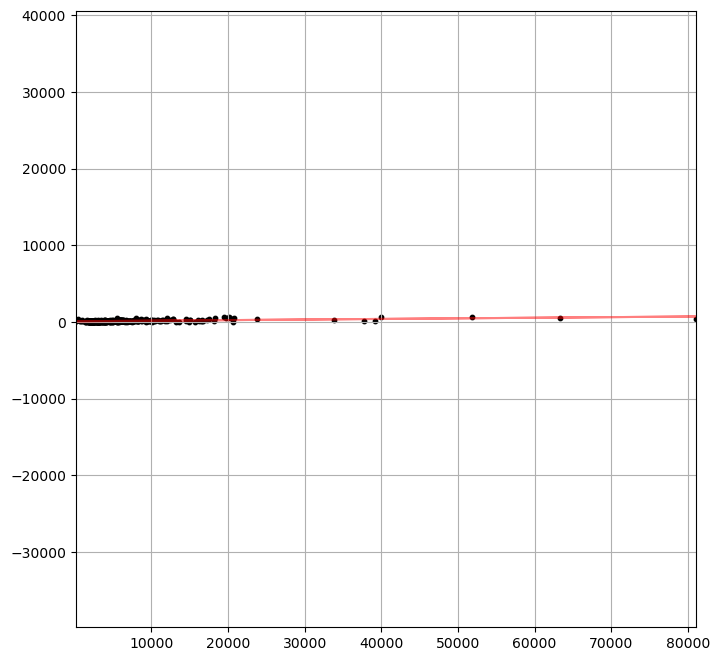

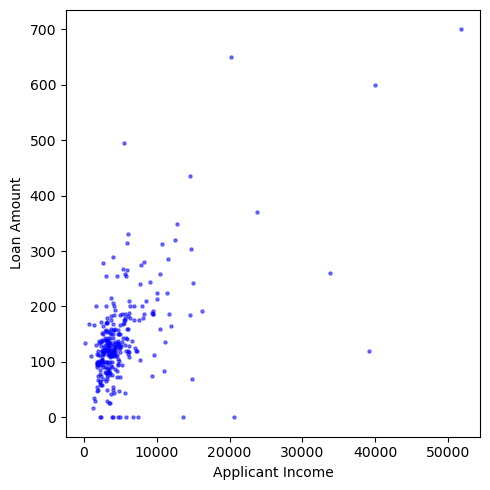

In [33]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y, color = "black", alpha = 1, s = 10)
plt.plot(x, predicted, color = "red", alpha = 0.5)
plt.margins(x = 0, y = 0) 
plt.grid()
plt.axis('equal')
plt.show()
#Sample points from the above graph 
def select_subset(seq, size):
    return seq[:size]

plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

Xi_sample = [select_subset(x, 300)]
Yi_sample = [select_subset(y, 300)]
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.scatter(Xi_sample, 
            Yi_sample, 
            marker="o", color="blue", alpha = 0.5 , s = 5)

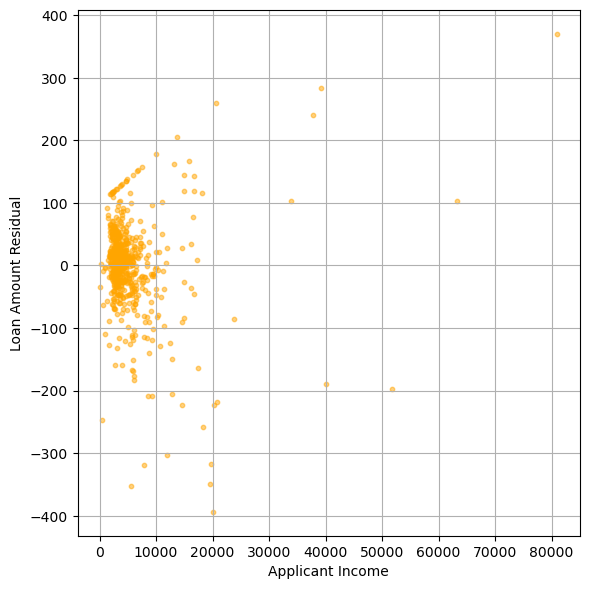

In [34]:
import matplotlib.pyplot as plt
import numpy as np
#DOWNLOAD PLOTTOOLS VIA CMD PROMPT:::import plottools

standardised_residuals = residual / np.std(residual)
#print(standardised_residuals)
plt.figure(figsize=(6,6))
plt.scatter(x, residual, color = "orange", alpha = 0.5 , s = 10)
plt.grid()
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount Residual')
#plt.margins(x = 0, y = 0) 
plt.axis('auto')
plt.show()

In [35]:
'''fig,ax = plt.subplots(6,6)
ax.plot(x, residual)
ax_zoom = plottools.zoom_axes(fig,ax,[0,20000],[-1.0,-0.8],[40000,-0.8],[40000,-0.8])
ax_zoom.plot(x,y)
plt.show()'''

'fig,ax = plt.subplots(6,6)\nax.plot(x, residual)\nax_zoom = plottools.zoom_axes(fig,ax,[0,20000],[-1.0,-0.8],[40000,-0.8],[40000,-0.8])\nax_zoom.plot(x,y)\nplt.show()'

## Multilinear Regression : Dependents and Property and Income VS Loan Amount

In [36]:
#X = TrainData[['Dependents','Property_Area','ApplicantIncome']]
X = TrainData[['ApplicantIncome', 'CoapplicantIncome']]
Y = TrainData['LoanAmount']

In [37]:
from sklearn import linear_model

In [38]:
MultiReg = linear_model.LinearRegression()
MultiReg.fit(X, Y)

LinearRegression()

In [39]:
LoanPredicted = MultiReg.predict([[1000, 1300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[2000, 2300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[3000, 3300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[4000, 4300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[5000, 5300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[6000, 6300]])
print(LoanPredicted)

[102.49516573]
[118.45944088]
[134.42371604]
[150.38799119]
[166.35226635]
[182.3165415]


E:\Downloads\ANACONDA3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Downloads\ANACONDA3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Downloads\ANACONDA3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Downloads\ANACONDA3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Downloads\ANACONDA3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Downloads\ANACONDA3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid fea

## Clustering By KMeans

In [40]:
import numpy as np
import pandas as pd

In [41]:
TrainDataK = TrainData
print(TrainDataK)

          Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                           
LP001002    Male      No          0      Graduate            No   
LP001003    Male     Yes          1      Graduate            No   
LP001005    Male     Yes          0      Graduate           Yes   
LP001006    Male     Yes          0  Not Graduate            No   
LP001008    Male      No          0      Graduate            No   
...          ...     ...        ...           ...           ...   
LP002978  Female      No          0      Graduate            No   
LP002979    Male     Yes         3+      Graduate            No   
LP002983    Male     Yes          1      Graduate            No   
LP002984    Male     Yes          2      Graduate            No   
LP002990  Female      No          0      Graduate           Yes   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                           

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [43]:
KMeanEncoder = LabelEncoder()

KMeanEncoder.fit(TrainDataK["LoanAmount"])
TrainDataK["LoanAmount"] = KMeanEncoder.transform(TrainDataK["LoanAmount"])
KMeanEncoder.fit(TrainDataK["Gender"])
TrainDataK["Gender"] = KMeanEncoder.transform(TrainDataK["Gender"])
KMeanEncoder.fit(TrainDataK["Married"])
TrainDataK["Married"] = KMeanEncoder.transform(TrainDataK["Married"])
KMeanEncoder.fit(TrainDataK["Dependents"])
TrainDataK["Dependents"] = KMeanEncoder.transform(TrainDataK["Dependents"])
KMeanEncoder.fit(TrainDataK["Education"])
TrainDataK["Education"] = KMeanEncoder.transform(TrainDataK["Education"])

KMeanEncoder.fit(TrainDataK["Self_Employed"])
TrainDataK["Self_Employed"] = KMeanEncoder.transform(TrainDataK["Self_Employed"])
KMeanEncoder.fit(TrainDataK["ApplicantIncome"])
TrainDataK["ApplicantIncome"] = KMeanEncoder.transform(TrainDataK["ApplicantIncome"])
KMeanEncoder.fit(TrainDataK["CoapplicantIncome"])
TrainDataK["CoapplicantIncome"] = KMeanEncoder.transform(TrainDataK["CoapplicantIncome"])
KMeanEncoder.fit(TrainDataK["Loan_Amount_Term"])
TrainDataK["Loan_Amount_Term"] = KMeanEncoder.transform(TrainDataK["Loan_Amount_Term"])
KMeanEncoder.fit(TrainDataK["Credit_History"])
TrainDataK["Credit_History"] = KMeanEncoder.transform(TrainDataK["Credit_History"])
KMeanEncoder.fit(TrainDataK["Property_Area"])
TrainDataK["Property_Area"] = KMeanEncoder.transform(TrainDataK["Property_Area"])
KMeanEncoder.fit(TrainDataK["Loan_Status"])
TrainDataK["Loan_Status"] = KMeanEncoder.transform(TrainDataK["Loan_Status"])

In [44]:
KMeanClusters = KMeans(n_clusters = 5).fit(TrainDataK.iloc[:, :])
LabelK = KMeanClusters.fit_predict(TrainDataK)
print(LabelK)
#print(KMeanClusters.labels_, '\n')
print(KMeanClusters.cluster_centers_, '\n')

[2 2 4 0 1 3 4 0 2 3 4 4 0 0 4 2 2 2 2 0 1 3 4 0 3 1 0 2 4 2 3 4 2 2 3 4 4
 2 3 2 2 4 4 3 2 2 2 1 0 3 4 4 2 2 1 4 4 0 3 0 0 4 0 2 2 3 0 1 1 2 0 4 2 2
 1 2 3 0 0 0 2 4 4 3 2 0 0 0 1 3 0 3 4 2 2 1 0 4 2 0 3 3 1 3 2 4 1 1 3 4 1
 0 0 1 2 1 0 4 3 1 3 2 0 4 3 2 1 2 3 3 1 4 4 2 2 3 2 0 1 2 3 1 1 0 1 0 1 4
 1 2 1 0 1 4 2 1 1 1 0 3 4 1 4 2 1 3 2 0 4 1 4 1 2 3 2 2 4 3 2 4 3 0 2 1 2
 3 4 0 0 1 2 1 1 2 2 0 3 0 0 1 0 2 2 2 2 2 2 3 4 2 1 2 1 1 0 2 4 2 2 3 4 2
 0 1 1 2 2 1 2 1 0 2 0 1 4 1 1 2 2 2 3 0 0 1 0 3 1 1 4 4 0 2 0 0 1 4 1 2 1
 2 3 0 2 1 2 3 2 2 2 4 4 1 4 0 2 4 3 4 1 2 3 2 4 4 1 0 4 2 2 1 0 2 4 1 0 2
 1 2 3 0 0 4 2 4 3 4 2 4 1 1 4 0 4 1 4 2 2 0 2 1 0 2 2 0 1 3 2 3 3 4 2 4 4
 1 1 3 1 0 4 2 4 4 2 4 0 0 0 0 3 0 1 3 0 2 4 2 3 2 4 3 2 3 3 0 1 1 4 2 1 3
 1 1 3 0 4 2 3 2 4 1 0 3 1 1 2 2 4 0 0 1 1 1 0 4 4 2 4 4 2 4 4 4 0 4 1 2 0
 4 1 1 2 1 1 0 0 4 4 0 0 2 1 4 4 1 1 0 2 1 4 4 1 1 1 0 2 1 4 4 1 1 3 1 3 1
 3 2 2 2 2 4 4 4 2 0 1 2 2 3 2 1 0 1 0 2 2 1 4 1 0 3 0 4 2 4 3 1 1 0 1 4 2
 4 0 1 1 0 2 1 3 4 0 1 2 

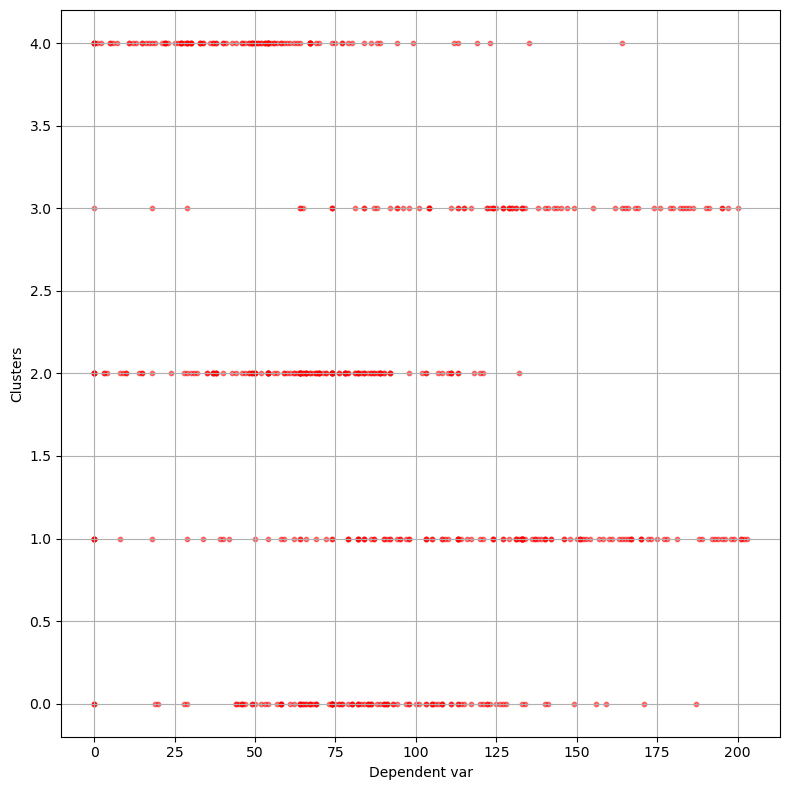

In [45]:
import matplotlib.pyplot as plt
import numpy as np
#DOWNLOAD PLOTTOOLS VIA CMD PROMPT:::import plottools
XDep = TrainDataK['LoanAmount']
plt.figure(figsize=(8,8))
plt.scatter(TrainDataK['LoanAmount'], KMeanClusters.labels_, color = "red", alpha = 0.5 , s = 10)
#plt.scatter(XDep, KMeanClusters.cluster_centers_, color = "black", alpha = 0.5 , s = 10)
plt.grid()
plt.xlabel('Dependent var')
plt.ylabel('Clusters')
#plt.margins(x = 0, y = 0) 
plt.axis('auto')
plt.show()

In [46]:
KMeanClusters = KMeans(n_clusters = 10)
LabelK = KMeanClusters.fit_predict(TrainDataK)
print(LabelK)
#print(KMeanClusters.labels_, '\n')
print(KMeanClusters.cluster_centers_, '\n')

[0 9 5 7 0 3 7 1 9 3 2 7 4 4 5 9 2 2 9 4 0 3 7 1 6 8 1 9 5 1 6 2 9 2 3 7 5
 2 6 2 2 5 5 6 9 2 9 0 4 6 7 2 9 9 8 5 7 1 3 1 4 2 4 9 9 3 1 8 0 9 1 7 2 9
 9 2 6 4 1 1 2 5 7 3 2 4 1 7 8 3 1 3 1 9 2 0 7 5 9 4 6 6 0 6 2 2 8 0 6 5 9
 1 6 0 9 8 1 5 6 8 3 9 4 5 6 2 8 2 3 3 8 7 5 2 9 6 9 1 8 9 6 9 0 7 8 4 0 5
 8 9 0 4 8 5 2 8 0 8 1 6 5 8 2 9 0 6 9 4 5 8 7 8 2 3 9 1 7 3 2 7 3 4 9 8 2
 3 5 7 4 8 9 8 0 2 9 1 3 4 1 0 4 9 2 2 9 9 2 6 5 2 8 2 8 0 1 2 7 2 9 6 5 9
 1 8 0 2 9 8 9 8 7 2 1 8 1 9 8 2 2 2 3 7 4 0 1 3 0 0 7 7 4 2 7 4 8 2 0 9 8
 9 3 7 2 0 9 6 9 9 2 7 2 0 7 7 2 7 6 2 8 9 6 9 5 7 0 1 7 1 9 8 1 9 2 9 4 9
 8 9 6 4 4 7 9 7 6 5 2 7 8 8 5 1 5 0 7 2 2 7 2 8 7 9 2 1 8 3 9 3 6 5 9 5 5
 8 8 6 9 4 5 9 7 5 9 2 7 4 1 1 3 4 8 3 7 9 5 2 3 2 7 3 9 3 6 1 0 0 5 9 0 3
 0 9 3 1 7 9 3 9 2 9 1 3 0 0 9 2 7 1 4 9 8 8 7 7 2 2 2 2 2 7 5 5 4 5 8 9 4
 5 0 8 2 0 8 7 4 5 5 4 4 2 0 5 7 0 0 4 9 0 5 5 0 0 8 4 2 0 7 5 8 0 6 8 6 8
 3 2 9 2 2 7 5 5 9 4 0 2 9 6 9 0 4 0 1 9 9 0 7 0 4 6 1 7 9 5 3 8 8 7 3 5 9
 2 4 8 8 4 2 8 6 5 4 9 2 

In [47]:
import matplotlib.pyplot as plt
#filter rows of original data
FilterLabel0 = TrainDataK[LabelK == 0]
u_labels = np.unique(LabelK)
for i in u_labels:
    plt.scatter(TrainDataK[LabelK == i , 0] , TrainDataK[LabelK == i , 0] , LabelK = i)
plt.legend()
plt.show()
#plotting the results
#plt.figure(figsize=(6,6))
#plt.scatter(FilterLabel0[:,0] , FilterLabel0[:,1])
#plt.show()

InvalidIndexError: (array([ True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False, False,  True, False, False,  True,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False,  True, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False]), 0)

## Clustering By KMedoids

In [48]:
import numpy as np
from sklearn_extra.cluster import KMedoids

In [49]:
KMedoidsClusters = KMedoids(n_clusters = 5, random_state = 0).fit(TrainDataK)
print(KMedoidsClusters.labels_)
print(KMedoidsClusters.cluster_centers_)
print(KMedoidsClusters.inertia_)

[1 1 2 3 4 4 0 3 2 4 2 0 3 3 0 1 2 2 1 3 4 4 0 2 3 4 3 1 0 2 3 2 1 2 4 0 0
 2 3 2 2 0 0 2 1 2 1 4 3 2 0 2 1 1 4 0 0 3 4 3 3 2 3 1 1 4 3 4 4 1 3 0 2 1
 4 2 3 3 3 3 2 0 0 4 1 3 2 0 4 4 3 4 2 1 2 1 3 0 1 3 3 3 4 3 2 2 4 4 3 0 1
 3 3 1 1 4 3 0 4 4 4 1 3 0 2 2 4 2 4 4 4 0 0 2 1 3 1 3 4 1 4 1 4 3 4 3 4 0
 4 1 4 3 4 0 2 4 4 4 3 3 0 4 2 1 4 3 1 3 0 4 0 4 2 3 1 2 0 3 2 0 4 3 1 4 2
 4 0 0 3 4 1 4 4 2 1 3 4 0 3 4 3 1 1 2 1 1 2 2 0 2 4 2 4 1 3 2 0 2 1 2 0 2
 3 4 4 2 1 4 1 4 0 2 3 4 2 4 4 2 2 2 4 0 3 4 3 4 4 4 0 0 3 2 3 3 4 2 4 1 4
 1 4 0 2 4 1 3 1 2 2 0 2 4 0 3 2 0 3 2 4 1 3 2 0 0 4 3 0 2 1 4 3 1 2 1 3 1
 4 1 4 3 3 0 1 0 3 0 2 0 4 4 0 3 0 4 0 2 2 0 2 4 3 1 2 3 4 4 1 4 2 0 1 0 0
 4 4 3 1 3 0 1 0 0 1 2 3 3 3 3 4 3 4 4 0 1 0 2 4 2 0 4 1 3 2 3 4 4 0 1 4 4
 4 1 4 3 0 1 4 1 2 1 3 4 4 4 1 2 0 3 3 1 4 4 3 0 2 2 2 2 2 0 0 0 3 0 4 1 3
 0 4 4 2 4 4 0 3 2 0 3 3 2 4 0 0 4 4 3 1 4 0 0 4 4 4 3 2 4 0 0 4 4 3 4 1 4
 4 2 1 2 2 0 0 0 2 3 4 2 1 3 1 4 3 4 3 1 1 4 0 4 3 2 3 0 1 0 3 4 4 0 4 0 1
 2 3 4 4 3 2 4 2 0 3 4 2 

## Clustering By Density and Agglomerative Methods 

In [50]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder

In [51]:
print(CategoricData)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [52]:
#Encoding for categorical data
encoder = LabelEncoder()
for i in range(len(CategoricData)):
    encoder.fit(TrainData[CategoricData[i]])
    TrainData[CategoricData[i]] = encoder.transform(TrainData[CategoricData[i]])

In [53]:
#print(len(TrainData_c)) ##flattened array len
print(TrainData[CategoricData])

          Gender  Married  Dependents  Education  Self_Employed  \
Loan_ID                                                           
LP001002       1        0           0          0              0   
LP001003       1        2           1          0              0   
LP001005       1        2           0          0              2   
LP001006       1        2           0          1              0   
LP001008       1        0           0          0              0   
...          ...      ...         ...        ...            ...   
LP002978       0        0           0          0              0   
LP002979       1        2           3          0              0   
LP002983       1        2           1          0              0   
LP002984       1        2           2          0              0   
LP002990       0        0           0          0              2   

          Property_Area  Loan_Status  
Loan_ID                               
LP001002              2            1  
LP001003   

In [54]:
#clustering using DBSCAN, epsilon = 10/100/1000(max euclidean distance), min samples = 5/10/100/1000(to form a dense cluster)
#all columns except first
dbscan = DBSCAN(eps = 100, min_samples = 10).fit(TrainData)
print(dbscan.labels_)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise_ = list(dbscan.labels_).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [55]:
#Agglomerative example
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [56]:
agglomerative = AgglomerativeClustering().fit(TrainData)
print(agglomerative.labels_)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(agglomerative.labels_)) - (1 if -1 in agglomerative.labels_ else 0)
n_noise_ = list(agglomerative.labels_).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

[0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1
 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0
 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1
 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0
 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0
 0 1 0 0 1 0 0 0 1 1 0 0 

# DATA REDUCTION

## By FP Tree and ECLAT

In [233]:
import pyfpgrowth

In [244]:
tuples = []
for i in range(0, 614):
    tuple = []
    for j in range(0, 11):
        val = TrainData.values[i, j]
        if str(val) != 'nan':
            tuple.append(val)
    tuples.append(tuple)
    tupleslist = TrainData.values.tolist()
    print("tuple:",tupleslist[i],'\n')
########################################################
mylist = [[x for x in sublist if str(x)!= 'nan']
         for sublist in tupleslist]
for a in range(len(mylist)):
    print(mylist[a],'\n')

tuple: [1, 0, 0, 0, 0, 376, 0, 0, 9, 1, 2, 1, 0] 

tuple: [1, 2, 1, 0, 0, 306, 60, 82, 9, 1, 0, 0, 0] 

tuple: [1, 2, 0, 0, 2, 139, 0, 27, 9, 1, 2, 1, 0] 

tuple: [1, 2, 0, 1, 0, 90, 160, 74, 9, 1, 2, 1, 0] 

tuple: [1, 0, 0, 0, 0, 381, 0, 95, 9, 1, 2, 1, 0] 

tuple: [1, 2, 2, 0, 2, 353, 241, 169, 9, 1, 2, 1, 0] 

tuple: [1, 2, 0, 1, 0, 65, 61, 49, 9, 1, 2, 1, 0] 

tuple: [1, 2, 3, 0, 0, 146, 174, 111, 9, 0, 1, 0, 0] 

tuple: [1, 2, 2, 0, 0, 269, 63, 120, 9, 1, 2, 1, 0] 

tuple: [1, 2, 1, 0, 0, 470, 282, 186, 9, 1, 1, 0, 1] 

tuple: [1, 2, 2, 0, 0, 171, 11, 29, 9, 1, 2, 1, 0] 

tuple: [1, 2, 2, 0, 1, 84, 99, 63, 9, 1, 2, 1, 0] 

tuple: [1, 2, 2, 0, 0, 150, 279, 140, 9, 1, 2, 1, 0] 

tuple: [1, 0, 0, 0, 0, 24, 189, 68, 9, 1, 0, 0, 0] 

tuple: [1, 2, 2, 0, 0, 7, 29, 2, 5, 1, 2, 1, 0] 

tuple: [1, 0, 0, 0, 0, 337, 0, 79, 9, 1, 2, 1, 0] 

tuple: [1, 0, 1, 1, 0, 218, 0, 54, 7, 0, 2, 1, 0] 

tuple: [0, 0, 0, 0, 0, 208, 0, 35, 9, 0, 2, 0, 0] 

tuple: [1, 2, 0, 1, 0, 331, 0, 87, 9, 1, 0, 0, 0]

In [245]:
#minsup = 100 , minconf = 0.2
freqpatt2 = pyfpgrowth.find_frequent_patterns(transactions = mylist,support_threshold = 200)
#for x2, y2 in freqpatt2.items():
    #print(x2, ':', y2)

In [246]:
rules2 = pyfpgrowth.generate_association_rules(patterns = freqpatt2, confidence_threshold = 0.2)
for a2, b2 in rules2.items():
    print(a2, ':', b2)

(0,) : ((), 2.224109224109224)
(0, 1) : ((), 1.9834881320949433)
(0, 2) : ((), 1.868909512761021)
(0, 9) : ((), 2.2303747534516765)
(0, 1, 9) : ((), 1.9914483507533596)
(0, 2, 2) : ((), 1.5446489434219495)
(0, 2, 9) : ((), 1.8717314487632508)
(0, 1, 1, 1) : ((), 1.567021609771375)
(0, 1, 1, 9) : ((), 1.7727531609522724)
(0, 1, 2, 2) : ((), 1.3517156862745099)
(0, 1, 2, 9) : ((), 1.6482877982445296)
(0, 2, 2, 9) : ((), 1.5628691983122363)
(0, 1, 1, 1, 2) : ((), 1.2815765900268736)
(0, 1, 1, 1, 9) : ((), 1.573052553112188)
(0, 1, 1, 2, 2) : ((), 1.175900900900901)
(0, 1, 2, 2, 9) : ((), 1.3607614369051275)
(0, 1, 1, 1, 2, 2) : ((), 1.0234942332336607)
(0, 1, 1, 1, 2, 9) : ((), 1.281056466302368)
(0, 1, 1, 2, 2, 9) : ((), 1.181740856251772)
(1, 1, 1, 2, 2, 9) : ((0,), 2.7422680412371134)
(0, 1, 1) : ((), 1.7639476721816083)
(0, 1, 2) : ((), 1.6493979560862086)
(0, 1, 1, 2) : ((), 1.4560760708366047)
(0, 1, 1, 2, 9) : ((), 1.4550101160685762)
(0, 0) : ((1,), 2.5899086689624196)
(0, 0, 1) :

##  By Dimensionality: Wavelet Transform (Observations only)

In [105]:
#Reduce dimensions of data
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
import pywt.data



print(pywt.families(short=True))

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


db1
CA: [ 57.98275606  71.4177849  186.67619023 113.13708499 216.37467504
  65.05382387 147.07821049  57.27564928  62.93250353 110.30865787
 169.70562748  96.16652224 169.70562748  98.99494937  56.56854249
 123.03657993  90.50966799 129.40054096 107.48023074 137.17871555
  35.35533906  86.2670273   66.46803743  76.36753237 121.62236636
  90.50966799 108.8944443  158.39191899  98.28784258 159.09902577
  89.80256121  82.7314934  166.17009358 184.55486989 119.50104602
 122.32947315  61.51828996 141.42135624 133.64318164 149.19953083
  45.96194078 202.9396462   74.24621202  78.48885271 190.91883092
 154.85638508  80.61017306   2.12132034  74.95331881 108.8944443
 135.05739521   0.         118.08683246 159.09902577 139.30003589
 129.40054096  74.24621202 143.54267658 104.65180362 205.06096654
  96.87362902  91.21677477 130.81475452 133.64318164 171.11984105
 166.17009358  22.627417   162.63455967  59.39696962 170.41273427
 177.48380208 141.42135624 132.22896808  24.04163056 162.63455967
 12

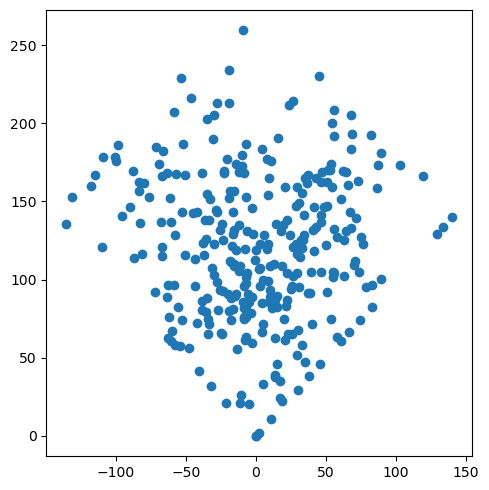

In [125]:
cA, cD = pywt.dwt(TrainData['LoanAmount'], 'db1')
print('db1')
print("CA:", cA, '\n')
print("CD:", cD, '\n')

plt.scatter(cD, cA)
plt.show()

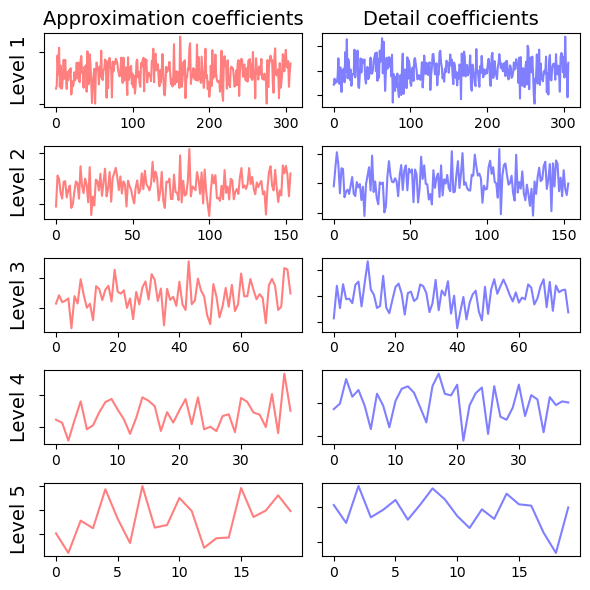

In [126]:
import pywt
 
'''x = TrainData
chirp_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(6,3))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
'''    
data = TrainData['LoanAmount']
waveletname = 'db1'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r', alpha = 0.5)
    axarr[ii, 1].plot(coeff_d, 'b', alpha = 0.5)
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])

plt.tight_layout()
plt.show()

## By Dimensionality: PCA

In [127]:
TrainData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Bin
Loan_ID,,,,,,,,,,,,,
LP001002,1,0,0,0,0,376,0,0,9,1,2,1,0
LP001003,1,2,1,0,0,306,60,82,9,1,0,0,0
LP001005,1,2,0,0,2,139,0,27,9,1,2,1,0
LP001006,1,2,0,1,0,90,160,74,9,1,2,1,0
LP001008,1,0,0,0,0,381,0,95,9,1,2,1,0


In [219]:
#try with different features
FeatureSpace = TrainData.drop(labels = 'Loan_Status', axis = 1)
Labels = TrainData['Loan_Status']

In [220]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

FeatureSpacetrain, FeatureSpacetest, Labelstrain, Labelstest = train_test_split(FeatureSpace, Labels, test_size=0.2, random_state=0)

In [221]:
###Normalise
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
FeatureSpacetrain = sc.fit_transform(FeatureSpacetrain)
FeatureSpacetest = sc.transform(FeatureSpacetest)

In [222]:
from sklearn.decomposition import PCA

pca = PCA()
FeatureSpacetrain = pca.fit_transform(FeatureSpacetrain)
FeatureSpacetest = pca.transform(FeatureSpacetest)

In [223]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.18166168 0.13294079 0.10687768 0.08964853 0.08548413 0.08234963
 0.07558058 0.06680591 0.05960918 0.05011446 0.04444766 0.02447975]


In [230]:
from sklearn.decomposition import PCA
###Chnange number of components
pca = PCA(n_components=1)
FeatureSpacetrain = pca.fit_transform(FeatureSpacetrain)
FeatureSpacetest = pca.transform(FeatureSpacetest)

In [231]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(FeatureSpacetrain, Labelstrain)

# Predicting the Test set results
Labelspred = classifier.predict(FeatureSpacetest)

In [232]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(Labelstest, Labelspred)
print(cm)
print('Accuracy' ,accuracy_score(Labelstest, Labelspred))

[[ 0 33]
 [ 6 84]]
Accuracy 0.6829268292682927


## Attribute Selection

In [247]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [252]:
array = TrainData.values
X = array[:,0:11]
Y = array[:,11]
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [ True  True False  True False False False False False  True  True]
Feature Ranking: [1 1 2 1 3 6 7 5 4 1 1]


E:\Downloads\ANACONDA3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Downloads\ANACONDA3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

## Attribute Creation 

##  By Numerosity: Histogram/Sampling/BELOW:Datacube Aggregation

# DATA TRANSFORMATION

## Normalisation

In [253]:
from sklearn.preprocessing import MinMaxScaler

In [254]:
Numerical_Features_2 = TrainData.select_dtypes(exclude = ['object']).columns.tolist()
dataframe_n_2 = TrainData[Numerical_Features_2]
print(dataframe_n_2)

          Gender  Married  Dependents  Education  Self_Employed  \
Loan_ID                                                           
LP001002       1        0           0          0              0   
LP001003       1        2           1          0              0   
LP001005       1        2           0          0              2   
LP001006       1        2           0          1              0   
LP001008       1        0           0          0              0   
...          ...      ...         ...        ...            ...   
LP002978       0        0           0          0              0   
LP002979       1        2           3          0              0   
LP002983       1        2           1          0              0   
LP002984       1        2           2          0              0   
LP002990       0        0           0          0              2   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                           

In [255]:
normaliser = MinMaxScaler(feature_range = (0,1))
norm_data = normaliser.fit_transform(dataframe_n_2)
print(norm_data)

[[0.5  0.   0.   ... 1.   1.   0.  ]
 [0.5  1.   0.25 ... 0.   0.   0.  ]
 [0.5  1.   0.   ... 1.   1.   0.  ]
 ...
 [0.5  1.   0.25 ... 1.   1.   0.  ]
 [0.5  1.   0.5  ... 1.   1.   0.  ]
 [0.   0.   0.   ... 0.5  0.   0.  ]]


In [257]:
TrainData[Numerical_Features_2] = norm_data
print(TrainData)

          Gender  Married  Dependents  Education  Self_Employed  \
Loan_ID                                                           
LP001002     0.5      0.0        0.00        0.0            0.0   
LP001003     0.5      1.0        0.25        0.0            0.0   
LP001005     0.5      1.0        0.00        0.0            1.0   
LP001006     0.5      1.0        0.00        1.0            0.0   
LP001008     0.5      0.0        0.00        0.0            0.0   
...          ...      ...         ...        ...            ...   
LP002978     0.0      0.0        0.00        0.0            0.0   
LP002979     0.5      1.0        0.75        0.0            0.0   
LP002983     0.5      1.0        0.25        0.0            0.0   
LP002984     0.5      1.0        0.50        0.0            0.0   
LP002990     0.0      0.0        0.00        0.0            1.0   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                           

##  Discretisation By Concept Hierarchy and Hierarchy Construction 

In [258]:
#Add this to feature_engine , EqualDiscretisation, KMeansDiscretisation, Decision Tree Discretisation, Custom Discretisation